<a href="https://colab.research.google.com/github/kuletha-rk/FordGoBike/blob/master/FGB_27th_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Ford Go Bike data analysis : Rishabh Kuletha**##

**https://www.linkedin.com/in/rishabh-kuletha-195375179/**



*System Data*
 
 
 Source - https://www.lyft.com/bikes/bay-wheels/system-data




Here you'll find Bay Wheels's trip data for public use. So whether you're a designer, developer or just plain curious, feel free to download it and bring it to life. This data is provided according to the Bay Wheels License Agreement.

The Data Each trip is anonymized and includes:
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID

Download Bay Wheels trip history data - https://s3.amazonaws.com/baywheels-data/index.html



##**Curosities leading to  this analysis?**##

Following are the curosities:
*   Impact of age,gender, duration, time of the day/week on ride demand.

*   Which Stations are most frequently used? Or which station has most demand for the bikes.

#   Such analysis can be used to further better user experience and target advertisement.





##**Setup libraries and reading data**##





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [0]:
df = pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
 13  member_birth_year        453159 non-null  float64
 14  memb

In [52]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [53]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


**Observations**


1.   Data has 15 columns entry and 519700 entries
2.   No information on user's age,but year. This need to addressed.
3. Duration and age are the variables where we will do univariate analysis.




In [0]:
df['member_age'] = 2020 - df['member_birth_year']

##univariate exploration##



checking the null values via coverage. This gives an idea about how healthy is data.

birth_year, member_gender and member_age has comparatively lower coverage, which may happen if this data was 'optional'.

In [69]:
pd.DataFrame(((df.count()-df.isnull().sum() )/df.count())*100 , columns=['coverage'])

,coverage
duration_sec,100.000000
start_time,100.000000
end_time,100.000000
start_station_id,100.000000
start_station_name,100.000000
start_station_latitude,100.000000
start_station_longitude,100.000000
end_station_id,100.000000
end_station_name,100.000000
end_station_latitude,100.000000


The above coverage shows our data has ~ 15% missing values in member_birth_year and member_gender column.

It will be taken care of when we do their univariate analysis.

##1##
*duration_sec*  ( univariate )


In [56]:
df['duration_sec'].describe().to_frame()

,duration_sec
count,519700.000000
mean,1099.009521
std,3444.146451
min,61.000000
25%,382.000000
50%,596.000000
75%,938.000000
max,86369.000000


Observations drom 'duration_sec':
1. Mimimum duration is {61 sec}  and Maximum is 86369 sec {~24 hours}
2. On an average user engages 1/2 hour with Go bike.
3. Instance of using GoBike for longer duration is seen in 75%, which is around 26 minutes. Means in 75% of net entries we've users using Gobike for more than 25 minutes.

4. Graphical visualisation would show a better picture.

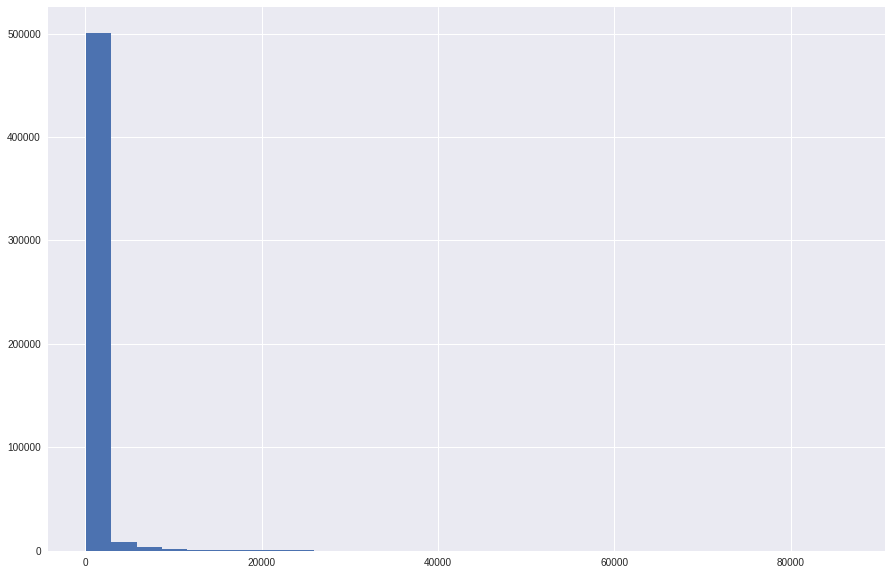

In [57]:
df['duration_sec'].hist(figsize = (15,10) , bins = 30)
plt.style.use('seaborn')

y-axis shows number of unique sessions/entries they're 519700 .
x- axis shows time in seconds, a user engages with the platform.

Inference:
1. clearly >500000 users spend less than 10000 sec in goBike platform.
This may suggest that go bikes are used for short distances.
2. Users spending > 24 hours as well as users spending < 5000 seconds i.e. 1 hr 22 mins are outliers.



***Dealing with 1hr 22 mins outlier having n number of users.***

- Slicing the 'duration_sec' column and plotting users clocking less than 1hr 22min.


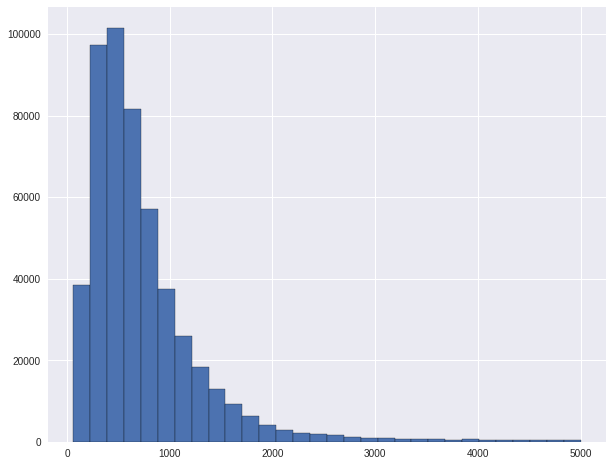

In [58]:
duration_filter = df.loc[:, 'duration_sec'] <= 5000
df.loc[duration_filter , 'duration_sec'].hist(figsize = (10,8) ,bins = 30 , edgecolor = 'black')
plt.style.use('seaborn')

y axis shows number of users, in numbers

x axis represents the duration, in seconds

>100000 users on the platform are riding for <5000 seconds.

This is an interesting observation as it represents around 19.5% of the total number of data sets available.

* This can be concluded that 20% of users like to spend <5000 seconds in the platform.

**Dealing with 24 hour usage of GoBikes**

- this also includes more than 10 hours of usage.

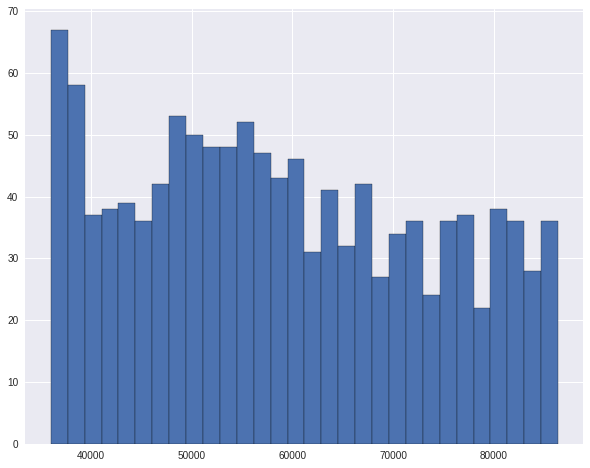

In [59]:
duration_filter2 = df.loc[:, 'duration_sec'] > 36000
df.loc[duration_filter2, 'duration_sec'].hist(figsize = (10,8) , bins = 30, edgecolor = 'black')
plt.style.use('seaborn')

Observations from ~ 10 hr users:

1. Maybe these users are Subscribers. We will need more info on that. 

2. The dock stations might be flawed. Since no one can practically use bike for this long duration. Despite putting bikes on their place, the session is not being terminated.
A user/subscriber chronicle analysis can help here.

3. Maybe some users are carrying bike with them all day long, like they are parking it in their office or parking spaces.

4. By utilizing geofence, these users can be penalised for extra usage. This would help in optimum utilization of gobikes.

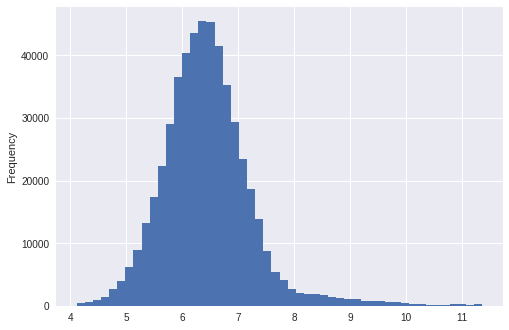

In [60]:
np.log(df['duration_sec']).plot(kind = 'hist' ,bins = 50)

##2##

member_age ( univariate )

In [61]:
df['member_age'].mode()

0    35.0
dtype: float64

In [62]:
df['member_age'].describe().to_frame()

,member_age
count,453159.000000
mean,39.595213
std,10.513488
min,21.000000
25%,32.000000
50%,37.000000
75%,46.000000
max,134.000000


Observations form member_age describe table:

1. Total number of entries are 453159, which is 66541 less than total entries.

2. Average age is 39 years. Minimum user age is 21 years. 
75% of users are above 45 years.

Maximum age is 134 years, this is a flaw.

35  <37 < 39

Mode < Median < Mean

Data is left skewed

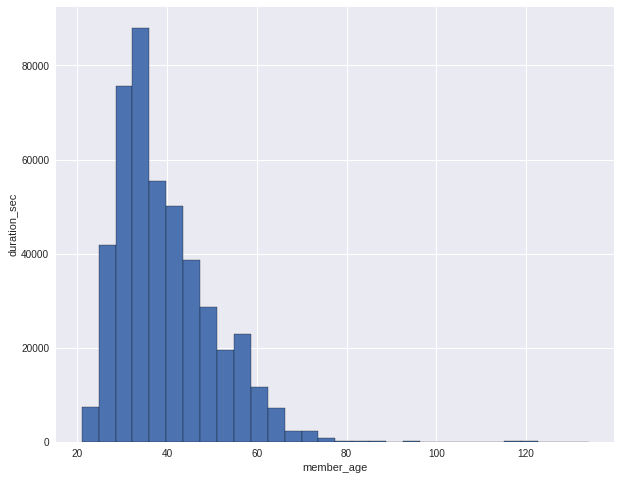

In [63]:
df['member_age'].hist(figsize = (10,8) ,bins = 30, edgecolor = 'black').set(xlabel = 'member_age' , ylabel = 'duration_sec')
plt.style.use('seaborn')

Observations:

1. <=60 years of users have heavy engagemet in platform.

2. Majority of users are in 21 to 80 years bracket, these are users who are clocking more than 1000 seconds.

##3##

start_station_name

end_station_name

-Let's analyse them.

In [64]:
df['start_station_name'].value_counts()


San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

# ask Shreyas- 'ascending', [:20].

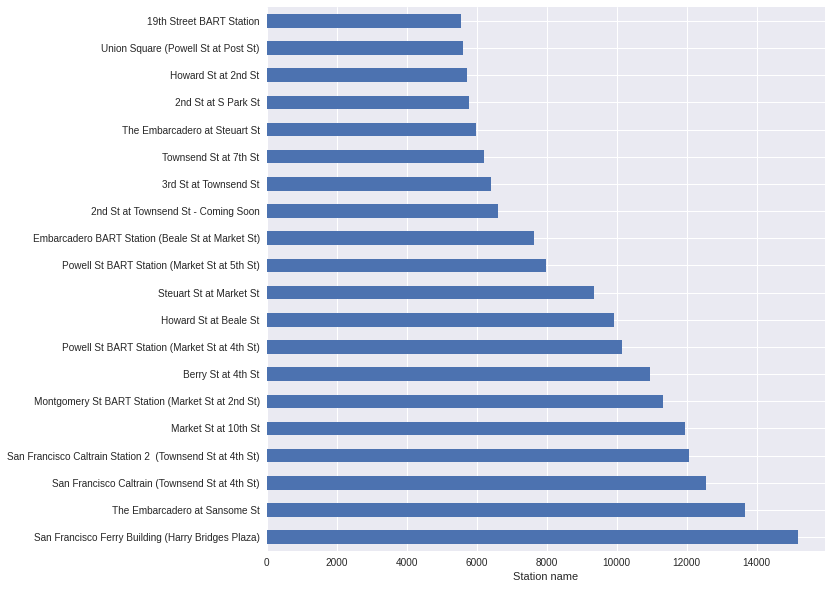

In [65]:
df['start_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' ,figsize = (10,10)).set(xlabel = 'Station name')
plt.style.use('seaborn')

observations:

1. San Francisco Ferry Building is the most used station.
2. More than 15187 sessions are clocked from here. Maybe this is a centre point of public transportation.


In [67]:
df['end_station_name'].value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Ellsworth St at Russell St                                       2
Empire St at 1st St                                              2
Name: end_station_name, Length: 272, dtype: int64

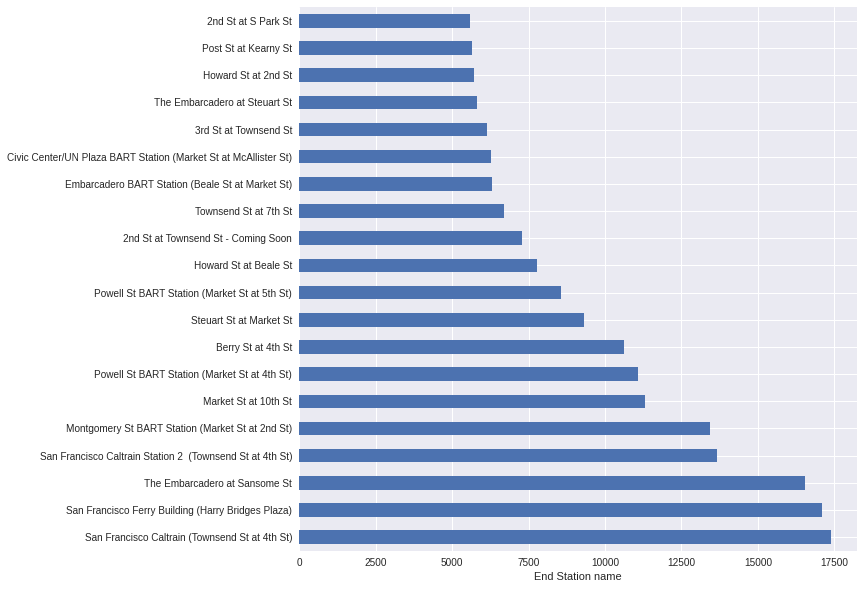

In [70]:
df['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , figsize = (10,10)).set(xlabel = 'End Station name')
plt.show()

Obs:

1. San Francisco Caltrain clocks most number of end station usage.

2. San Francisco Ferry Building and San Francisco Caltrain seems to be popular start and end choices among users.

3. If we were to advertize or take surveys, these stations would be a better place to start.

##4##

Gender distribution 
&
User types

In [71]:
df['member_gender'].describe()

count     453238
unique         3
top         Male
freq      348318
Name: member_gender, dtype: object

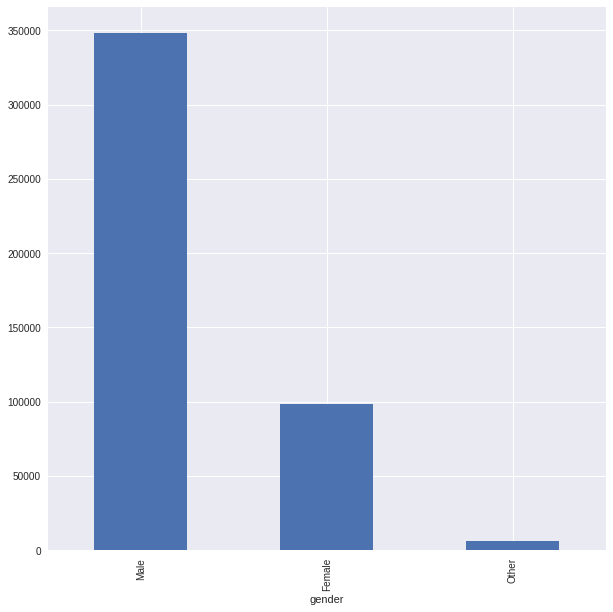

In [77]:
df['member_gender'].value_counts().plot(kind = 'bar', figsize = (10,10)).set(xlabel = 'gender')
plt.show()

Obs:

1. Clearly Male gender engagement is more with the platform.

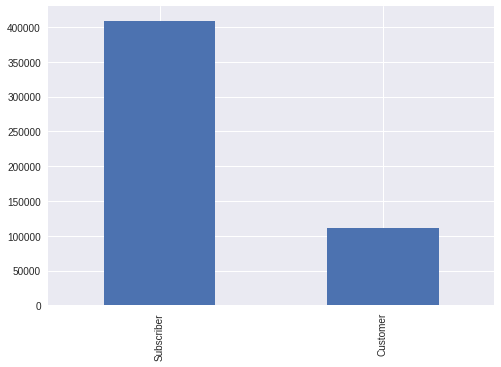

In [80]:
df['user_type'].value_counts().plot(kind = 'bar')
plt.show()

Obs:

1. we need clarity on definition of Subs and Customer.

2. Subs engagement is greater than Customer's

**Minutes of Analysis**

*MOA*

1. By analysing duration_sec, *we concluded* that users using gobikes for more than 10 hrs could be outliers.
Further slicing of different durations can be done, if needed.

2. member_age provided with a context about age of gobikes user. 21 to 60 years showed heavy engagement in platform. This is a good distribution among all age group. 
But since user is giving out this info, *we cannot conclude* it is 100% true.
Note : We've a user with 134 years of age. So we need to take this into consideration before taking any call with member_age data.

3. Start and End stations analysis showed what are major points in city where our users begin and end their journey.
*This data can be relied* for targetting adverstiment according to age groups.
Data can further be sliced to get specific user - station engagement.

4. Gender diversification shows strong base of male users. If this data is supplied by user, *we can't rely* on it.

                              **END**

                                of

                        
                        Univariate Analysis

**Bivariate analysis**

In [83]:
df.corr()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age
duration_sec,1.000000,0.003569,0.001438,0.004094,0.011965,0.002159,0.002296,-0.012617,0.004903,-0.004903
start_station_id,0.003569,1.000000,-0.345664,0.624608,0.570371,-0.330293,0.631477,-0.048995,0.103517,-0.103517
start_station_latitude,0.001438,-0.345664,1.000000,-0.720633,-0.341441,0.988059,-0.726552,0.001819,-0.051305,0.051305
start_station_longitude,0.004094,0.624608,-0.720633,1.000000,0.655876,-0.727264,0.992206,-0.079755,0.065323,-0.065323
end_station_id,0.011965,0.570371,-0.341441,0.655876,1.000000,-0.365819,0.649186,-0.050836,0.100570,-0.100570
end_station_latitude,0.002159,-0.330293,0.988059,-0.727264,-0.365819,1.000000,-0.728524,0.002874,-0.051550,0.051550
end_station_longitude,0.002296,0.631477,-0.726552,0.992206,0.649186,-0.728524,1.000000,-0.078613,0.067359,-0.067359
bike_id,-0.012617,-0.048995,0.001819,-0.079755,-0.050836,0.002874,-0.078613,1.000000,0.005002,-0.005002
member_birth_year,0.004903,0.103517,-0.051305,0.065323,0.100570,-0.051550,0.067359,0.005002,1.000000,-1.000000
member_age,-0.004903,-0.103517,0.051305,-0.065323,-0.100570,0.051550,-0.067359,-0.005002,-1.000000,1.000000


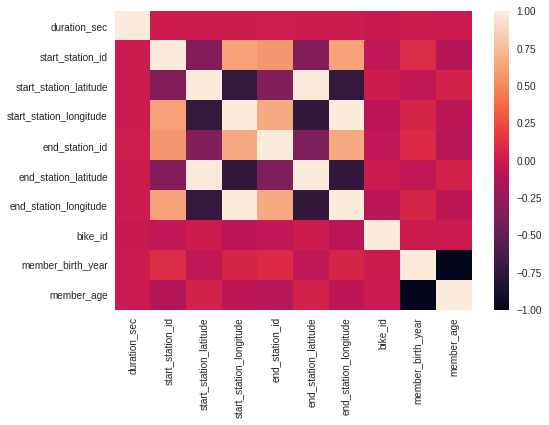

In [86]:
sns.heatmap(df.corr())


It is hard to establish any correlation yet, based on the given data.
